# K-Means Clustering (Works on Linearly Seperable Data)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [145]:
raw_data = pd.read_csv("iris_raw.csv")
raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [147]:
raw_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

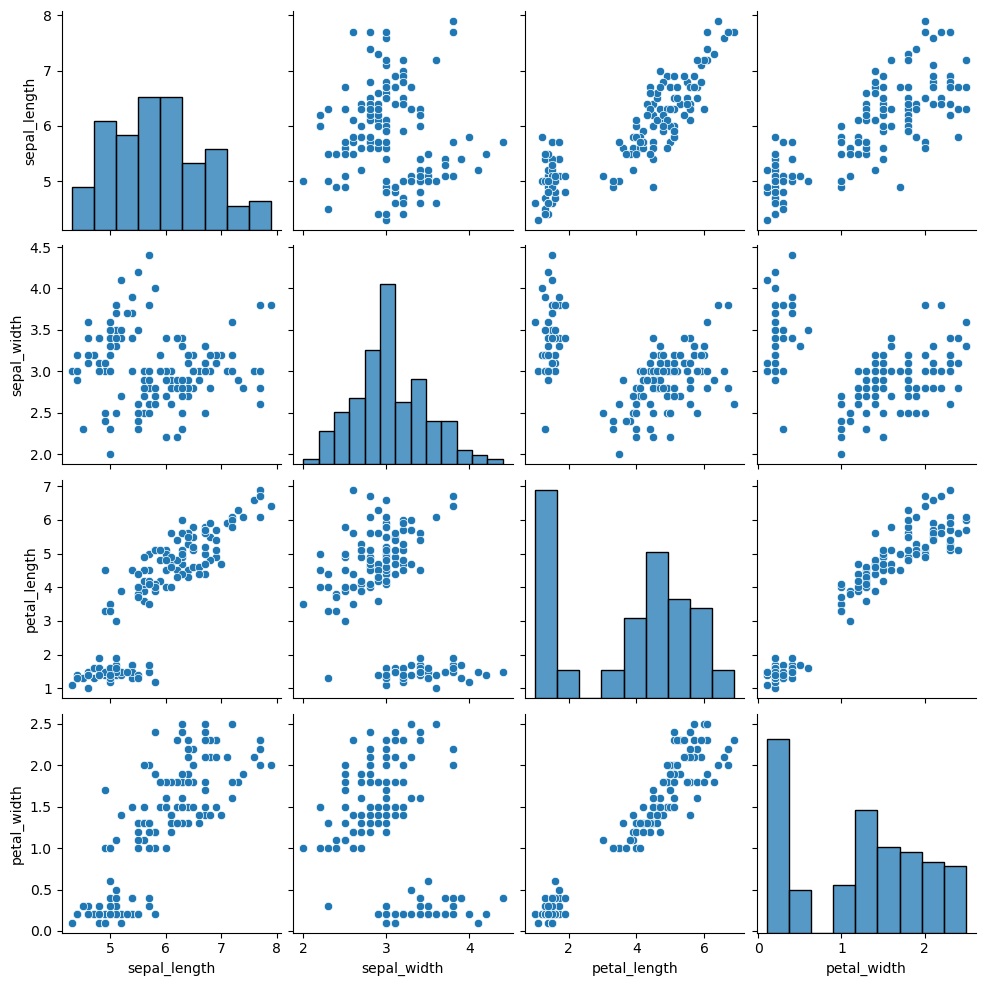

In [149]:
sns.pairplot(data = raw_data)
plt.show()

In [151]:
from sklearn.cluster import KMeans

In [153]:
wcss = []

for i in range(2,21):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(raw_data)
    wcss.append(km.inertia_)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

In [28]:
wcss

[152.36870647733906,
 78.94506582597731,
 57.44028021295474,
 46.56163015873016,
 39.18020672938385,
 38.01101253631426,
 33.00118369292798,
 28.10357400932402,
 26.79745475113122,
 26.904118022476716,
 23.91831378915203,
 23.34959433213845,
 21.622132159507167,
 20.77996212121213,
 19.205833485958486,
 18.896177130746793,
 16.276917388167387,
 16.814032051282055,
 15.726726190476192]

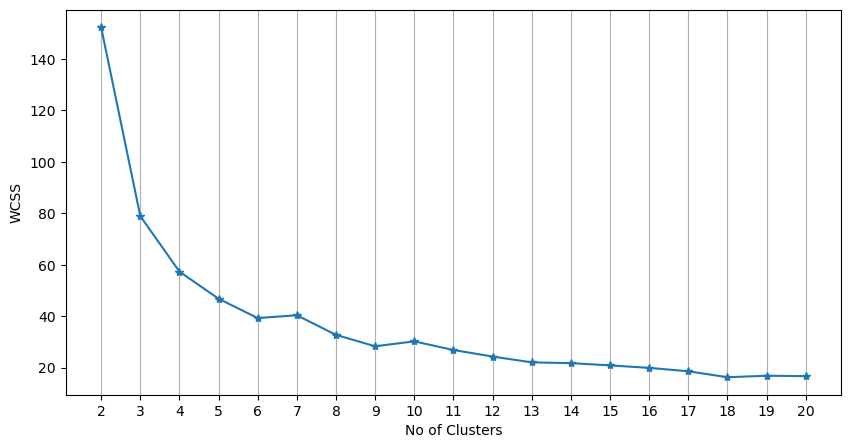

In [155]:
plt.figure(figsize = [10,5])
plt.plot([i for i in range(2,21)],wcss,marker = "*")
plt.xlabel("No of Clusters")
plt.xticks([i for i in range(2,21)])
plt.ylabel("WCSS")
plt.grid(axis = 'x')
plt.show()

### Here we can see that the elbow curve is shown between 3 and 4 so we can select the number based on our Dataset

In [157]:
km1 = KMeans(n_clusters=3)
raw_data["Predicted"] = km1.fit_predict(raw_data)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [159]:
raw_data

,sepal_length,sepal_width,petal_length,petal_width,Predicted
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


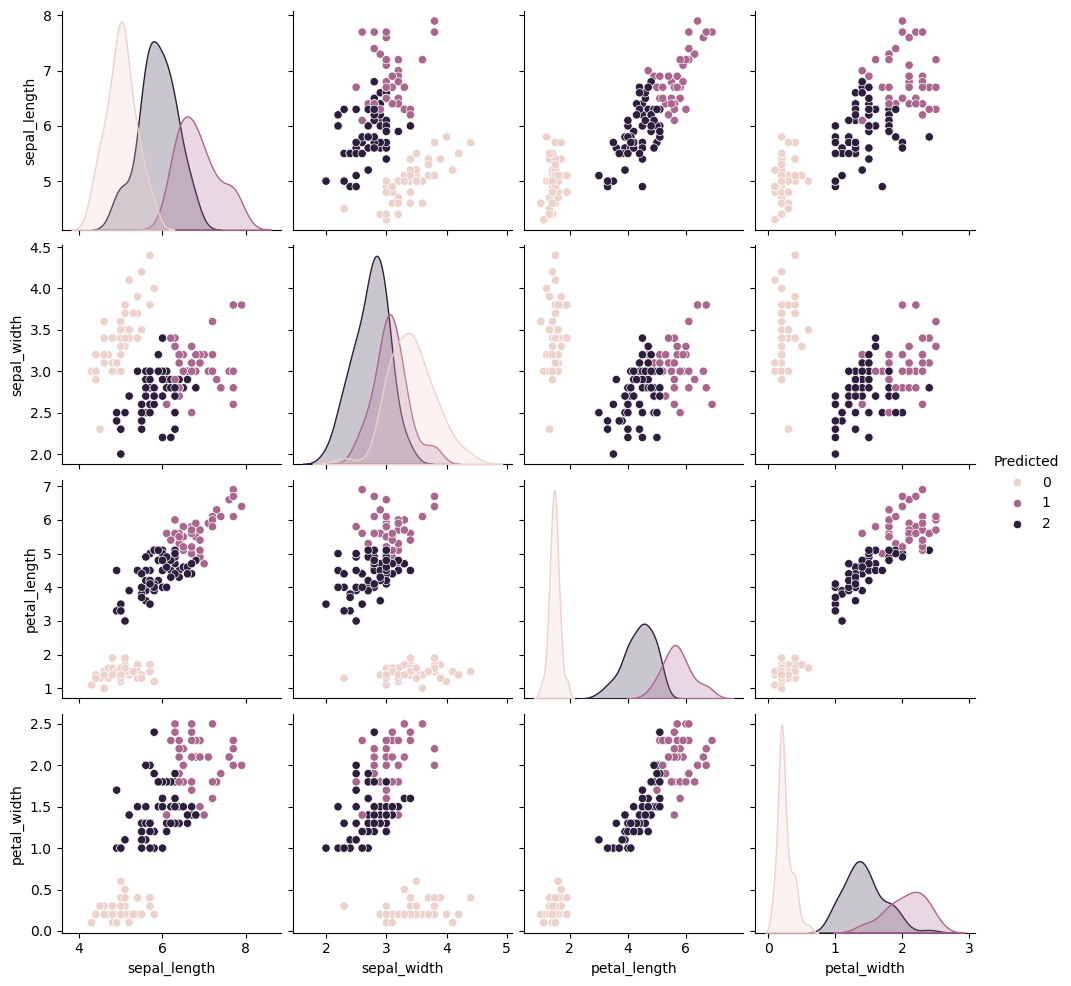

In [161]:
sns.pairplot(data = raw_data,hue = "Predicted")
plt.show()

### From this pairplot we can compare both the original and clustered data

In [64]:
org_data = pd.read_csv("iris.csv")
org_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


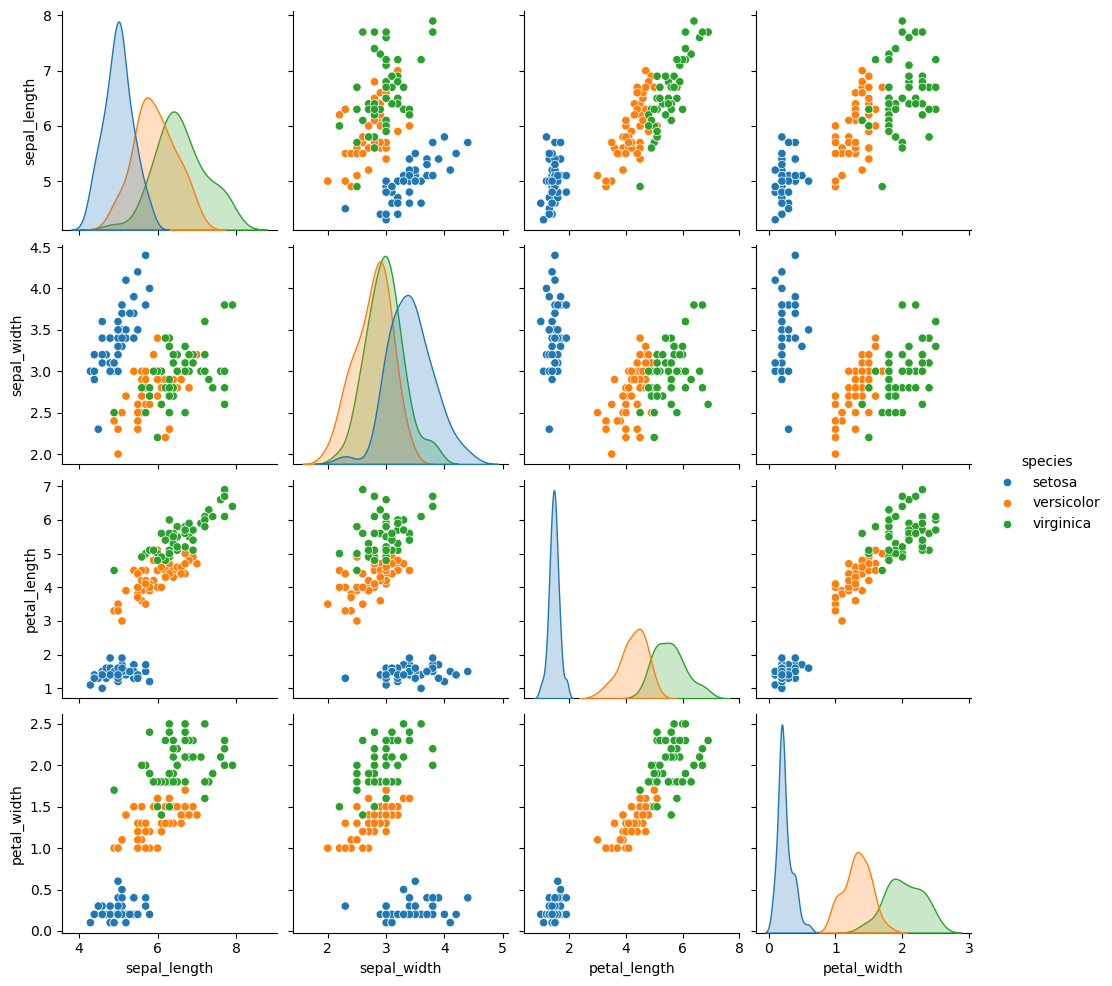

In [66]:
sns.pairplot(data = org_data,hue = "species")
plt.show()

### Now you can save both the graphs using savefig and compare them side_by_side  

# Silhouette Score (Tells us the no of clusters we took are correct or not)

In [164]:
from sklearn.metrics import silhouette_score

In [166]:
raw_data

,sepal_length,sepal_width,petal_length,petal_width,Predicted
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [170]:
new_data = raw_data.iloc[:,:-1]

In [172]:
new_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [186]:
ss = []
no_of_clusters = [j for j in range(2,21)]
for i in range(2,21):
    km2 = KMeans(n_clusters=i)
    km2.fit(new_data)
    ss.append(silhouette_score(new_data,km2.labels_))

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

In [180]:
n = [j for j in range(2,21)]
n

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

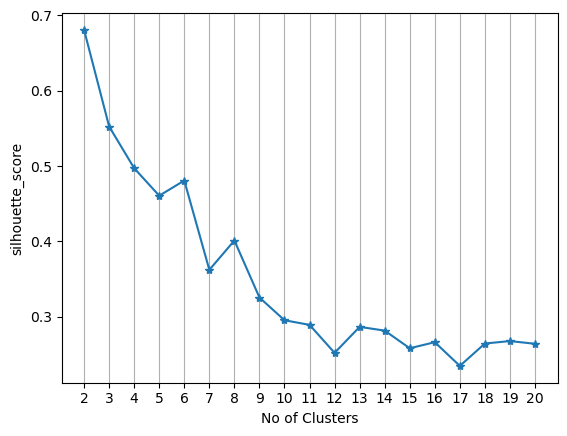

In [200]:
plt.plot(no_of_clusters,ss,marker = "*")
plt.xlabel("No of Clusters")
plt.ylabel("silhouette_score")
plt.xticks([i for i in range(2,21)])
plt.grid(axis = "x")
plt.show()

### Here the silhouette_score is suggesting us to use 2 clusters where as the wcss told us to use 3 clusters , Here we go with silhouette_score as it describes the no of clusters to be used in the dataset 

# Hierarchal Clustering (Works on Linearly Seperable Data)

### Agglomerative Hierarchal Clustering

In [75]:
raw = pd.read_csv("iris_raw.csv")
raw.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [80]:
import scipy.cluster.hierarchy as sc

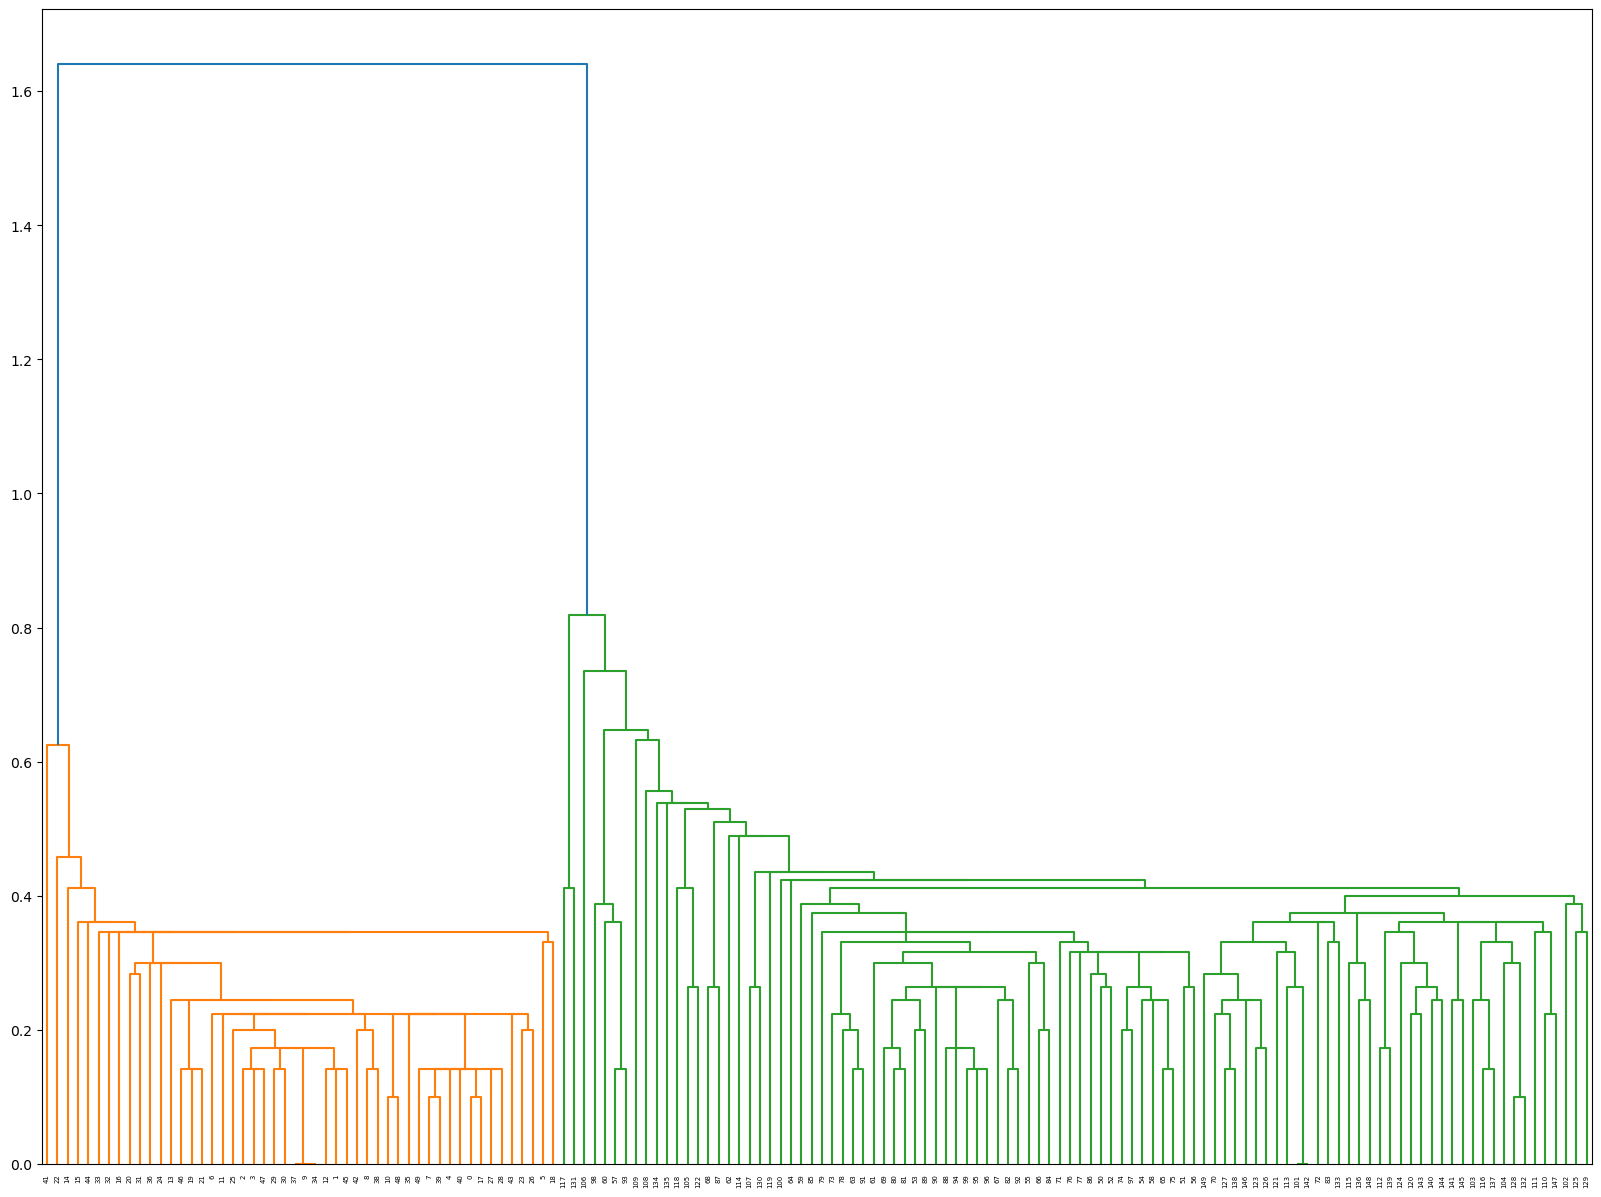

In [84]:
plt.figure(figsize = (20,15))
sc.dendrogram(sc.linkage( raw,method='single', metric='euclidean'))
plt.show()

#### The top most line cuts two lines so we use two clusters 

In [87]:
from sklearn.cluster import AgglomerativeClustering

### We can change linkage based on our requirments

In [91]:
ac = AgglomerativeClustering(n_clusters=2,linkage='single')
raw["Predicted"] = ac.fit_predict(raw)

In [93]:
raw

,sepal_length,sepal_width,petal_length,petal_width,Predicted
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


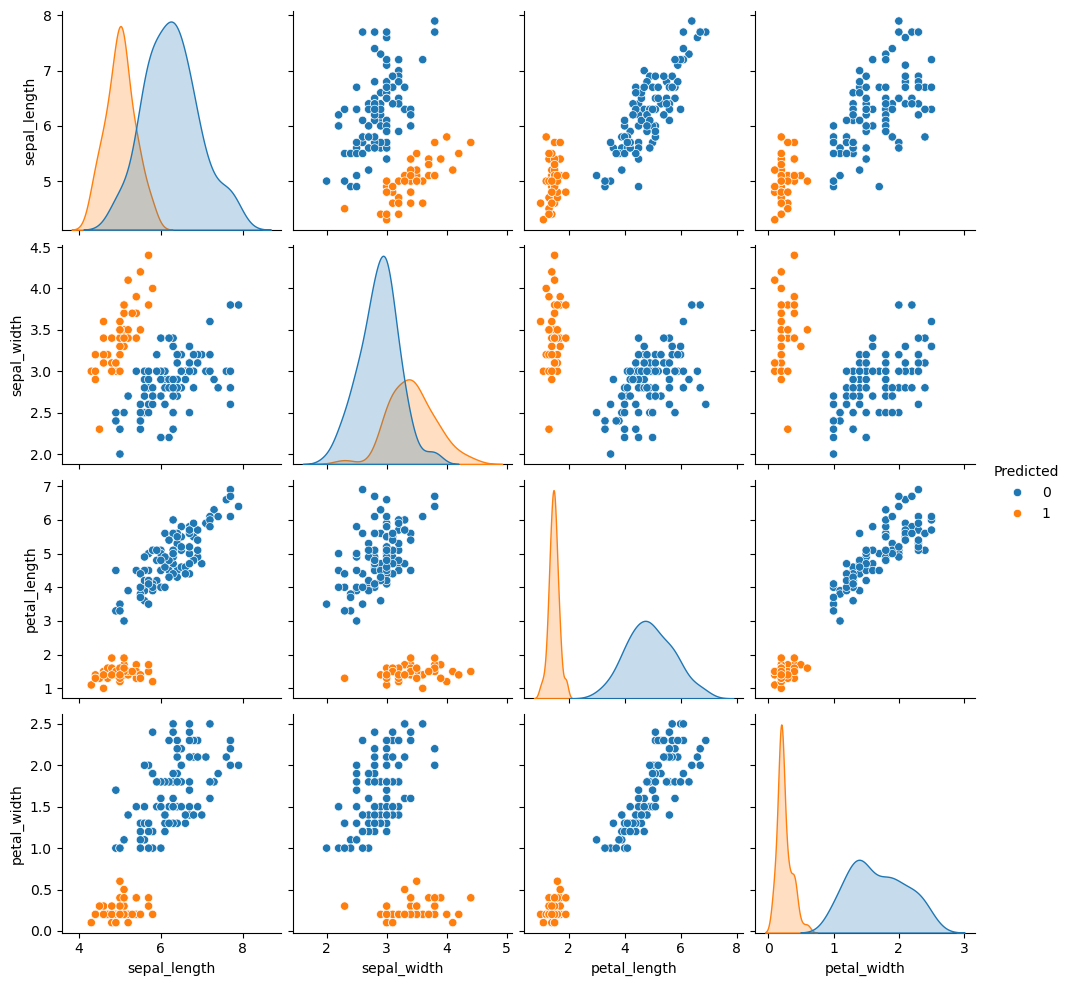

In [95]:
sns.pairplot(data = raw,hue = "Predicted")
plt.show()

# DBSCAN Clustering Algorithm (Used for Non-Linear Seperable Data)

In [106]:
from sklearn.datasets import make_moons

In [108]:
x,y = make_moons(n_samples=200,noise=None)

In [113]:
df = pd.DataFrame(x,columns=["d1","d2"])
df["output"] = y

In [117]:
df.head()

,d1,d2,output
0,-0.356886,0.934148,0
1,1.630553,-0.276146,1
2,1.959493,0.218267,1
3,0.889162,-0.493838,1
4,1.000000,0.000000,0


In [123]:
xx = df.iloc[:,:-1]
yy = df["output"]

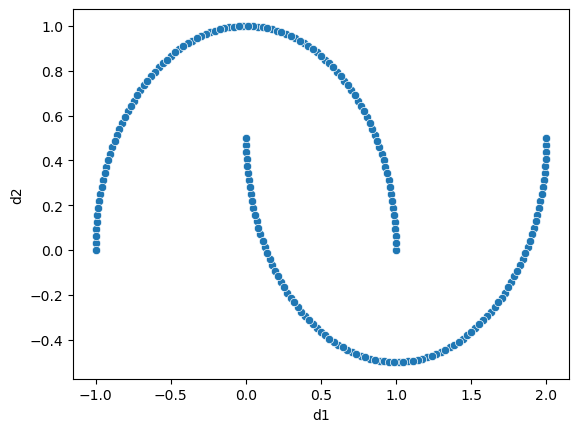

In [129]:
sns.scatterplot(x= "d1",y="d2",data = df)
plt.show()

### Clearly the data is non-linear

In [132]:
from sklearn.cluster import DBSCAN

In [136]:
db = DBSCAN(eps=0.5,min_samples=5) #eps = radius of the circle
df["Predicted"] = db.fit_predict(df)

In [140]:
df.head()

,d1,d2,output,Predicted
0,-0.356886,0.934148,0,0
1,1.630553,-0.276146,1,1
2,1.959493,0.218267,1,1
3,0.889162,-0.493838,1,1
4,1.000000,0.000000,0,0


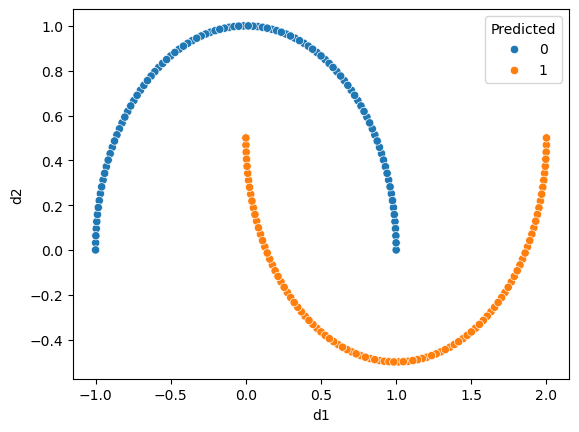

In [138]:
sns.scatterplot(x= "d1",y="d2",data = df,hue = "Predicted")
plt.show()

### You can use noise(*wrong data*) and can change eps and min_samples values to make better clusters

# Association Rule Learning

In [3]:
data = pd.read_csv("new_groceries.csv")
data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9'],
      dtype='object')

In [11]:
data.values

array([[4, 'citrus fruit', 'semi-finished bread', ..., nan, nan, nan],
       [3, 'tropical fruit', 'yogurt', ..., nan, nan, nan],
       [1, 'whole milk', nan, ..., nan, nan, nan],
       ...,
       [10, 'chicken', 'citrus fruit', ..., 'domestic eggs',
        'rolls/buns', 'rum'],
       [4, 'semi-finished bread', 'bottled water', ..., nan, nan, nan],
       [5, 'chicken', 'tropical fruit', ..., nan, nan, nan]], dtype=object)

In [15]:
data.shape[0]

9835

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
dtypes: int64(1), object(9)
memory usage: 768.5+ KB


### We seperated the string values and appended them in a list called market

In [19]:
market = []

for i in range(0,data.shape[0]) :
    cus = []
    for j in data.columns:
        if type(data[j][i])==str:
            cus.append(data[j][i])
    market.append(cus)

In [21]:
market

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [23]:
import collections

In [36]:
L = []

for i in market:
    for j in i:
        L.append(j)

In [38]:
L

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 'tropical fruit',
 'yogurt',
 'coffee',
 'whole milk',
 'pip fruit',
 'yogurt',
 'cream cheese',
 'meat spreads',
 'other vegetables',
 'whole milk',
 'condensed milk',
 'long life bakery product',
 'whole milk',
 'butter',
 'yogurt',
 'rice',
 'abrasive cleaner',
 'rolls/buns',
 'other vegetables',
 'UHT-milk',
 'rolls/buns',
 'bottled beer',
 'liquor (appetizer)',
 'potted plants',
 'whole milk',
 'cereals',
 'tropical fruit',
 'other vegetables',
 'white bread',
 'bottled water',
 'chocolate',
 'citrus fruit',
 'tropical fruit',
 'whole milk',
 'butter',
 'curd',
 'yogurt',
 'flour',
 'bottled water',
 'dishes',
 'beef',
 'frankfurter',
 'rolls/buns',
 'soda',
 'chicken',
 'tropical fruit',
 'butter',
 'sugar',
 'fruit/vegetable juice',
 'newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk',
 'pastry',
 'whole milk',
 'tropical f

### Counter takes a single list values so we converted list of lists into a single list

In [40]:
c = collections.Counter(L)

In [44]:
c.keys()

dict_keys(['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups', 'tropical fruit', 'yogurt', 'coffee', 'whole milk', 'pip fruit', 'cream cheese', 'meat spreads', 'other vegetables', 'condensed milk', 'long life bakery product', 'butter', 'rice', 'abrasive cleaner', 'rolls/buns', 'UHT-milk', 'bottled beer', 'liquor (appetizer)', 'potted plants', 'cereals', 'white bread', 'bottled water', 'chocolate', 'curd', 'flour', 'dishes', 'beef', 'frankfurter', 'soda', 'chicken', 'sugar', 'fruit/vegetable juice', 'newspapers', 'packaged fruit/vegetables', 'specialty bar', 'butter milk', 'pastry', 'processed cheese', 'detergent', 'root vegetables', 'frozen dessert', 'sweet spreads', 'salty snack', 'waffles', 'canned beer', 'sausage', 'brown bread', 'shopping bags', 'beverages', 'hamburger meat', 'spices', 'hygiene articles', 'napkins', 'pork', 'berries', 'whipped/sour cream', 'artif. sweetener', 'grapes', 'dessert', 'zwieback', 'domestic eggs', 'spread cheese', 'misc. beverages', 'hard 

In [46]:
c.values()

dict_values([814, 152, 522, 15, 1032, 1351, 500, 2509, 744, 374, 37, 1901, 101, 285, 539, 57, 23, 1754, 325, 716, 69, 129, 45, 381, 990, 377, 520, 157, 147, 516, 580, 1575, 422, 284, 574, 648, 128, 226, 272, 807, 159, 144, 1072, 97, 74, 299, 305, 733, 924, 591, 787, 251, 327, 42, 236, 385, 567, 327, 683, 29, 220, 364, 65, 582, 106, 243, 228, 188, 256, 80, 140, 147, 235, 184, 64, 234, 438, 120, 112, 49, 166, 74, 30, 249, 69, 86, 49, 94, 260, 89, 305, 160, 183, 38, 83, 225, 130, 19, 42, 233, 82, 29, 38, 66, 157, 13, 40, 52, 102, 27, 17, 78, 64, 16, 69, 19, 8, 35, 45, 254, 31, 98, 50, 25, 104, 88, 55, 35, 102, 6, 48, 55, 21, 11, 66, 89, 85, 6, 76, 18, 23, 50, 23, 12, 23, 37, 6, 32, 22, 32, 39, 9, 33, 9, 22, 12, 5, 19, 23, 4, 8, 11, 4, 17, 12, 1, 2, 1])

In [54]:
new_dd = {"Items" : c.keys(),"Values" : c.values()}

In [61]:
new_dd = pd.DataFrame(new_dd)
new_dd.sort_values(by = ["Values"],ascending = False)

,Items,Values
7,whole milk,2509
11,other vegetables,1901
17,rolls/buns,1754
31,soda,1575
5,yogurt,1351
...,...,...
159,baby cosmetics,4
162,bags,4
166,kitchen utensil,2
165,sound storage medium,1


### scikit-learn does not contain Association rules we need to import mlxtend

### Apriori

In [65]:
from mlxtend.preprocessing.transactionencoder import TransactionEncoder

### TransactionEncoder converts a list of transactions into a one-hot encoded DataFrame.This prepares the data for use with the Apriori algorithm.

In [67]:
tr = TransactionEncoder()
tr.fit(market)

TransactionEncoder()

In [71]:
ap = pd.DataFrame(tr.transform(market),columns=tr.columns_)

In [73]:
ap

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
from mlxtend.frequent_patterns import apriori

In [85]:
apriori(ap,min_support=0.05,use_colnames=True,max_len=3).sort_values(by = ["support"])

,support,itemsets
7,0.050839,(coffee)
28,0.052364,"(rolls/buns, whole milk)"
0,0.052466,(beef)
8,0.052872,(curd)
12,0.053076,(margarine)
29,0.054296,"(yogurt, whole milk)"
4,0.054804,(butter)
17,0.057651,(pork)
11,0.058363,(fruit/vegetable juice)
10,0.058973,(frankfurter)


### Frequent-Pattern Growth algorithm

In [89]:
from mlxtend.frequent_patterns import fpgrowth

In [95]:
fpgrowth(ap,min_support=0.05,use_colnames=True).sort_values(by=["support"])

,support,itemsets
4,0.050839,(coffee)
29,0.052364,"(rolls/buns, whole milk)"
13,0.052466,(beef)
12,0.052872,(curd)
1,0.053076,(margarine)
27,0.054296,"(yogurt, whole milk)"
8,0.054804,(butter)
25,0.057651,(pork)
17,0.058363,(fruit/vegetable juice)
15,0.058973,(frankfurter)
